# Project 3, Problem 1: Missouri Demographic Study

### Using Esri's USA Tapestry Service for Counties, create a Python Notebook that answers the following questions:
1. For the counties in Missouri only, what is the dominant Tapestry LifeMode Group Name(TLIFENAME)? (10 points)
2. Create a histrogram that shows the number of Missouri counties per Tapestry LifeMode Group Name(TLIFENAME) (5 points)
3. Create a pie chart that shows the number of Missouri counties per Tapestry LifeMode Group Name(TLIFENAME) (5 points)
4. For the counties in Missouri, what is the dominant Dominant Tapestry Segment Name (TSEGNAME) (10 points)
5. Create a histogram that shows the number of Missouri counties per Tapestry Segment Name (TSEGNAME). (5 points)
6. Create a pie chart that shows the number of Missouri counties per Tapestry Segment Name (TSEGNAME). (5 points)
7. Is there Any correlation between LifeMode Group and Segment name? Hint: plot TSEGNAME' vs. TLIFENAME. (2 points)
8. Make sure the notebook is well-documented. (8 points)
9. Bonus Explore the data and show me somethig cool that I haven't thought of. (5 Points)

In [1]:
from arcgis.gis import GIS
gis = GIS("http://slustl.maps.arcgis.com/home", "laurenlovato_slustl")

Enter password: ········


### Access layer from feature service

In [2]:
from arcgis.features import FeatureLayer
lyr_url = 'http://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/Tapestry_Households/FeatureServer/1'
counties_lyr = FeatureLayer(lyr_url)
counties_lyr

<FeatureLayer url:"http://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/Tapestry_Households/FeatureServer/1">

### Query for just the counties in MO

In [3]:
query_MOco = counties_lyr.query(where='"ST_ABBREV"=\'MO\'')
len(query_MOco.features)

115

### Table of TLIFENAME

In [4]:
query_TLIFE = counties_lyr.query(where='"ST_ABBREV"=\'MO\'', out_fields='TLIFENAME')
query_TLIFE.df

,OBJECTID,TLIFENAME,SHAPE
0,1484,Middle Ground,"{'rings': [[[-10280362.7670118, 4916410.069564..."
1,1485,Cozy Country Living,"{'rings': [[[-10531483.9534014, 4884315.773069..."
2,1486,Cozy Country Living,"{'rings': [[[-10616987.3411962, 4950653.710427..."
3,1487,Hometown,"{'rings': [[[-10209994.3775193, 4770334.446140..."
4,1488,Rustic Outposts,"{'rings': [[[-10420742.210988, 4428344.5967196..."
5,1489,Cozy Country Living,"{'rings': [[[-10472244.1734035, 4528665.856542..."
6,1490,Cozy Country Living,"{'rings': [[[-10471351.390976, 4642762.9568824..."
7,1491,Cozy Country Living,"{'rings': [[[-10360213.3509528, 4654569.976182..."
8,1492,Rustic Outposts,"{'rings': [[[-10003900.8116267, 4456719.049613..."
9,1493,Middle Ground,"{'rings': [[[-10276399.9044591, 4757035.729460..."


In [5]:
import pandas as pd

In [6]:
new_sdf = query_TLIFE.df
new_sdf['TLIFENAME'].mode()

0    Cozy Country Living
dtype: object

### 1. Dominant Tapestry LifeMode Group Name(TLIFENAME) is Cozy Country Living

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
new_sdf['TLIFENAME'].value_counts()

Cozy Country Living      49
Rustic Outposts          37
Family Landscapes         9
Hometown                  9
GenXurban                 4
Middle Ground             4
Scholars and Patriots     2
Senior Styles             1
Name: TLIFENAME, dtype: int64

### 2. Create a histrogram (bar chart) that shows the number of Missouri counties per Tapestry LifeMode Group Name(TLIFENAME)

Text(0.5,1,'Tapestry LifeMode Group Name(TLIFENAME) in Missouri')

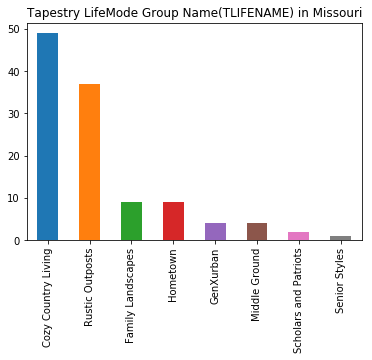

In [9]:
tlife = new_sdf['TLIFENAME'].value_counts()
tlife.plot.bar()
plt.title('Tapestry LifeMode Group Name(TLIFENAME) in Missouri')

### 3. Create a pie chart that shows the number of Missouri counties per Tapestry LifeMode Group Name(TLIFENAME)

Text(0.5,1,'Tapestry LifeMode Group Name(TLIFENAME) in Missouri')

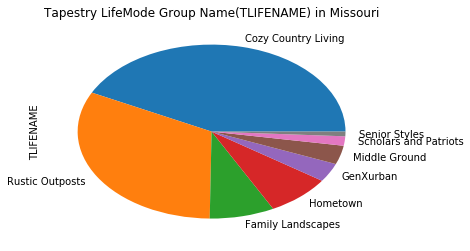

In [10]:
tlife.plot.pie()
plt.title('Tapestry LifeMode Group Name(TLIFENAME) in Missouri')

### Table of TSEGNAME

In [11]:
query_TSEG = counties_lyr.query(where='"ST_ABBREV"=\'MO\'', out_fields='TSEGNAME')
query_TSEG.df

,OBJECTID,TSEGNAME,SHAPE
0,1484,Old and Newcomers,"{'rings': [[[-10280362.7670118, 4916410.069564..."
1,1485,Heartland Communities,"{'rings': [[[-10531483.9534014, 4884315.773069..."
2,1486,Prairie Living,"{'rings': [[[-10616987.3411962, 4950653.710427..."
3,1487,Small Town Simplicity,"{'rings': [[[-10209994.3775193, 4770334.446140..."
4,1488,Southern Satellites,"{'rings': [[[-10420742.210988, 4428344.5967196..."
5,1489,Heartland Communities,"{'rings': [[[-10472244.1734035, 4528665.856542..."
6,1490,Prairie Living,"{'rings': [[[-10471351.390976, 4642762.9568824..."
7,1491,Rural Resort Dwellers,"{'rings': [[[-10360213.3509528, 4654569.976182..."
8,1492,Rooted Rural,"{'rings': [[[-10003900.8116267, 4456719.049613..."
9,1493,Bright Young Professionals,"{'rings': [[[-10276399.9044591, 4757035.729460..."


### 4. For the counties in Missouri, what is the dominant Dominant Tapestry Segment Name (TSEGNAME)?

In [12]:
new_sdf2 = query_TSEG.df
new_sdf2['TSEGNAME'].mode()

0    Rooted Rural
dtype: object

In [13]:
new_sdf2['TSEGNAME'].value_counts()

Rooted Rural                  27
Heartland Communities         16
Prairie Living                16
Salt of the Earth              9
Middleburg                     8
Southern Satellites            8
Small Town Simplicity          6
Rural Resort Dwellers          4
Green Acres                    4
Traditional Living             2
College Towns                  2
Rustbelt Traditions            2
Rural Bypasses                 2
Old and Newcomers              2
Midlife Constants              2
Senior Escapes                 1
Bright Young Professionals     1
Soccer Moms                    1
Emerald City                   1
Family Foundations             1
Name: TSEGNAME, dtype: int64

### Dominant TSEGNAME is Rooted Rural

### 5. Create a histogram (bar chart) that shows the number of Missouri counties per Tapestry Segment Name (TSEGNAME)

Text(0.5,1,'Tapestry Segment Name(TSEGNAME) in Missouri')

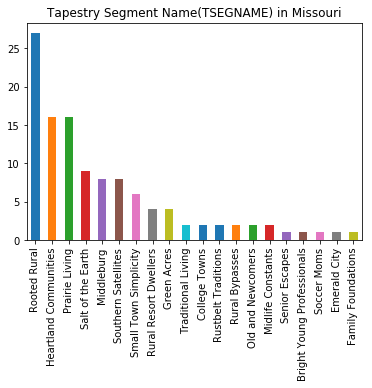

In [14]:
tseg = new_sdf2['TSEGNAME'].value_counts()
tseg.plot.bar()
plt.title('Tapestry Segment Name(TSEGNAME) in Missouri')

### 6. Create a pie chart that shows the number of Missouri counties per Tapestry Segment Name (TSEGNAME)

Text(0.5,1,'Tapestry Segment Name(TSEGNAME) in Missouri')

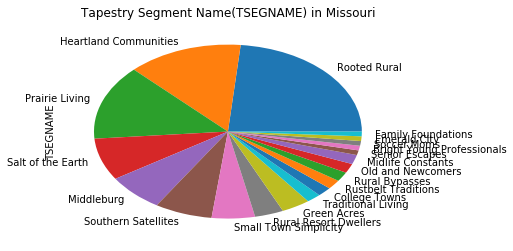

In [15]:
tseg.plot.pie()
plt.title('Tapestry Segment Name(TSEGNAME) in Missouri')

### 7. Is there any correlation between LifeMode Group and Segment name? (Hint: plot TSEGNAME vs. TLIFENAME). Correlation between top 5 TSEGNAME and TLIFENAME 

Text(0,0.5,'TSEGNAME')

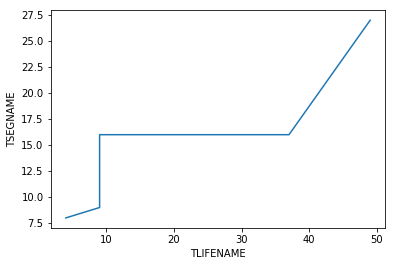

In [16]:
x = tlife.head()
y = tseg.head()

plt.plot (x, y)
plt.xlabel('TLIFENAME')
plt.ylabel('TSEGNAME')

### Looks to be some sort of correlation between TSEGNAME and TLIFENAME. From this and previous charts, Cozy Country Living and Rooted Rural were the most common groups, which seems like they would be related.

### Bonus: Explore the data and show something cool. Map of Tapestry data with outline of Missour counties.

In [17]:
map1 = gis.map('Missouri')
map1

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…

In [18]:
map1.add_layer(counties_lyr)

In [19]:
lyr2_url = 'http://services2.arcgis.com/jWXb6JPWtBjOCalT/arcgis/rest/services/MissouriCounties/FeatureServer/0'
mo_lyr = FeatureLayer(lyr2_url)
map1.add_layer(mo_lyr)